# 第三章 线性模型

## 3.1 试析在什么情形下式(3.2) 中不必考虑偏置项 b.

中心化的样本数据，没有截距项，样本重心过原点。

## 3.2 试证明，对于参数$w$，对率回归的目标函数(3.18) 是非凸的，但其对数似然函数(3.27) 是凸的.

参考：

[\[转载\]机器学习中常用的矩阵求导公式](http://blog.sina.com.cn/s/blog_14b5db8290102x1zq.html)

[矩阵求导公式有哪些? - 柴士童的回答 - 知乎](https://www.zhihu.com/question/350887271/answer/859865647)

先推一下附录的公式，熟悉一下结构，根据@柴士童的回答和常见的矩阵求导公式
$$
\frac{\partial w^Tx}{\partial x} = w
\\
\frac{\partial -X^TB^TA}{\partial t} 
= -(\frac{\partial X^T}{\partial t})^TB^TA
$$
有
$$
\frac{\partial w^Tx}{\partial w} 
= \frac{\partial (x^Tw)^T}{\partial w} 
= (\frac{\partial x^Tw}{\partial w})^T 
= (x^T)^T
= x
$$
利用已有结论
$$
\frac{\partial y}{\partial w}
= \frac{x \cdot e^{(w^Tx + b)}}{(1 + e^{(w^Tx + b)})^2}
= x \cdot (y - y^2)
\\
\frac{\partial^2 y}{\partial w^2}
= \frac{\frac{\partial y}{\partial w}}{\partial w^T}
= \frac{\partial x \cdot (y - y^2)}{\partial y} \cdot \frac{\partial y}{\partial w^T}
= x \cdot (1 - 2y) \cdot (\frac{\partial y}{\partial w})^T
= x x^T (y - y^2)(1 - 2y)
$$
显然$(y - y^2)(1 - 2y)$不恒非负，故(3.18)式非凸。

PS：这里没搞懂为什么 @四去六进一 [机器学习(周志华) 参考答案 第三章 线性模型](https://blog.csdn.net/icefire_tyh/article/details/52069025)中算的$(x \cdot (y - y^2))^T$是$x^T(y^2 - y)$而不是$x^T(y - y^2)$

同理求(3.27)式关于$w$的二阶偏导
$$
\frac{\partial^2 L}{\partial w^2}
= \sum_{i = 1}^{m}{x_i x_i^T p_1 (1 - p_1)}
$$
显然对于$p_1 \in (0,1)$，上式恒大于0，故(3.27)式为凸函数。

## 3.3 编程实现对率回归，并给出西瓜数据集 3.0α 上的结果.

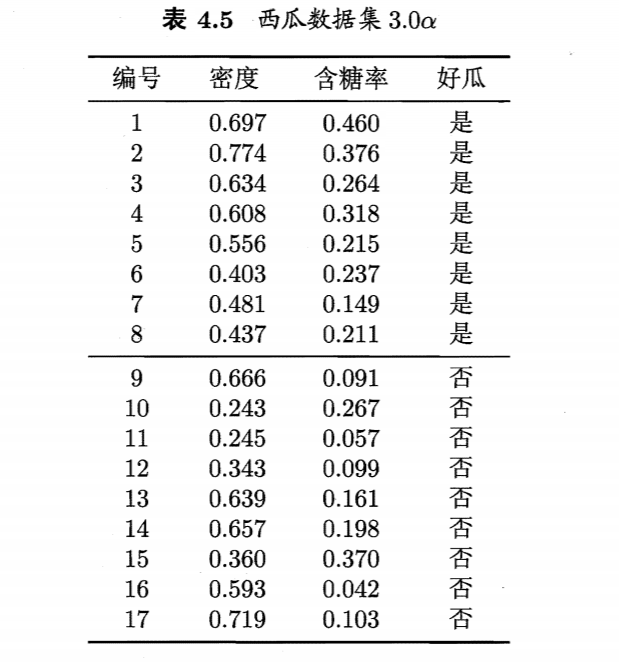

参考：

[《机器学习（周志华）》 西瓜数据集3.0](https://blog.csdn.net/wiking__acm/article/details/50971461)

[pandas的dataframe赋值操作](https://www.cnblogs.com/math98/p/10888893.html)

[warning：A value is trying to be set on a copy of a slice from a DataFrame](https://blog.csdn.net/qq_42711381/article/details/90451301)

[pandas：Indexing and selecting data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

[Python实现简单的梯度下降法](https://www.cnblogs.com/noluye/p/11108513.html)

[性能度量指标](https://blog.csdn.net/hfutdog/article/details/88085878)

[使用sklearn进行交叉验证](https://www.cnblogs.com/jiaxin359/p/8552800.html#_label3_0)

[sklearn逻辑回归(Logistic Regression,LR)类库使用小结](https://blog.csdn.net/sun_shengyun/article/details/53811483)

[通俗地说逻辑回归【Logistic regression】算法（二）sklearn逻辑回归实战](https://www.cnblogs.com/listenfwind/p/11780766.html)

这里使用梯度下降法和梯度下降法，先求似然函数$L$关于$\beta$的一阶偏导和二阶偏导：
$$
grad_{L}(\beta) 
= \frac{\partial L}{\partial \beta}
= -\sum_{i = 1}^{m}(x_i \cdot (y_i - p_1))
\\
grad^2_{L}(\beta)
= \frac{\partial^2 L}{\partial \beta^2}
= \sum_{i = 1}^{m}x_i x_i^T p_1 (1 - p_1)
$$
其中$p_1 = \frac{1}{1 + e^{-\beta^T x}}$

于是得到更新规则：$\beta_{new} = \beta_{old} - \alpha \cdot grad_{L}(\beta_{old})$，拟牛顿法相比于梯度下降法只需将$\alpha$改为$(\frac{\partial^2 L}{\partial \beta^2})^{-1}$.

为了减少多重循环的使用，选择向量化代码，在这里说明一下具体代码中使用的公式。

数据集（带截距项）是一个17x3的矩阵$(x_i)_{17 \times 3}$，记作X，和一个17x1的列向量$(y_i)_{17 \times 1}$，记作Y，X和Y的每一行构成一组样本，即$(x_{i1},x_{i2},x_{i3})$与$(y_i)$。

$p_{i1} = \frac{1}{1 + e^{-(\beta^T x_i)}}$其中$\beta^T x_i$在代码中为$(x_i)_{17 \times 3} \cdot \beta_{3 \times 1}$，初始化代入$\beta = beta_{cur}$.

一阶偏导公式$grad_{L}(\beta)$中，$y_i - p_1$是一个17x1的列向量，每一行是$y_i$与$p_{i1}(x_i;\beta)$的差，$(x_i)_{17 \times 3}$与$(y_i)_{17 \times 1}$对应位置相乘，因为单个来看就是向量乘数。对所有样本求和，即对$(x_i)_{17 \times 3}$每一列求和，得到一个${(grad_L)}_{3 \times 1}$.

二阶偏导公式$grad^2_{L}(\beta)$类似，向量化的代码与最终写成$(x_i)^T_{3 \times 17} \cdot (p_{i1})_{17 \times 17} \cdot (x_i)_{17 \times 3}$，其中$(p_{i1})_{17 \times 17}$是对角线元为$p_{i1}(x_i,\beta)$其他位置元素为0的矩阵。最后的$grad^2_{L}$是一个3x3矩阵。

In [1]:
import pandas as pd
import numpy as np

In [2]:
read_path = 'D:\JWE\Files\Courses\数据挖掘\melon_data.csv'
melon_data = pd.read_csv(read_path)
# Y = melon_data.loc[:,['好瓜']].replace(['是','否'],[1,0]) # replace方法不改变原dataframe
data0 = melon_data.loc[:,['编号','密度','含糖率','好瓜']][:]
data0.loc[data0['好瓜'] == '是',['好瓜']] = 1
data0.loc[data0['好瓜'] == '否',['好瓜']] = 0
data0

,编号,密度,含糖率,好瓜
0,1,0.697,0.460,1
1,2,0.774,0.376,1
2,3,0.634,0.264,1
3,4,0.608,0.318,1
4,5,0.556,0.215,1
5,6,0.403,0.237,1
6,7,0.481,0.149,1
7,8,0.437,0.211,1
8,9,0.666,0.091,0
9,10,0.243,0.267,0


In [3]:
X = np.c_[data0[['密度','含糖率']].values,np.ones(len(data0))]
Y = data0['好瓜'].values

p_1 = lambda x,beta:1/(1 + np.exp(-np.dot(x,beta.T)))
grad_L = lambda x,beta,y:-sum(x * (y.reshape(len(y),1) - p_1(x=x,beta=beta)))
grad_L_2 = lambda x,beta,y:np.dot(np.dot(x.T,np.diag(p_1(x=x,beta=beta) * (1 - p_1(x=x,beta=beta)))),x)

def gradient_descent(x,y,beta_cur=np.array([[0,0,1]]),alpha=10**(-2),precision=10**(-4),max_iters=10**(4)):
    for i in range(max_iters):
        grad_cur = grad_L(x=x,y=y,beta=beta_cur)
        if np.abs(grad_cur).all() < precision:
            break
        beta_cur = beta_cur - alpha * grad_cur
    return beta_cur

def newton(x,y,beta_cur=np.array([[0,0,1]]),alpha=np.linalg.inv(grad_L_2(x=X,y=Y,beta=np.array([[0,0,1]]).reshape((3,)))),precision=10**(-4),max_iters=10**(4)):
    for i in range(max_iters):
        grad_cur = grad_L(x=x,y=y,beta=beta_cur)
        if np.abs(grad_cur).all() < precision:
            break
        beta_cur = beta_cur - np.dot(alpha,grad_cur)
    return beta_cur    

beta_hat_gd = gradient_descent(x=X,y=Y,max_iters=10**4)
beta_hat_gd
beta_hat_nt = newton(x=X,y=Y,max_iters=10**2) # 相比之下，牛顿法需要的迭代次数更少。
beta_hat_nt
Y_gd = p_1(x=X,beta=beta_hat_gd)
predict_gd = Y_gd/(1 - Y_gd)
accuracy_gd = sum([1 if i == j else 0 for i,j in zip([1 if each >= 1 else 0 for each in predict_gd],Y)])/len(Y)
Y_nt = p_1(x=X,beta=beta_hat_nt)
predict_nt = Y_nt/(1 - Y_nt)
accuracy_nt = sum([1 if i == j else 0 for i,j in zip([1 if each >= 1 else 0 for each in predict_nt],Y)])/len(Y)
print(f'梯度下降法，准确率:{accuracy_gd}')
print(f'{predict_gd}')
print(f'牛顿法，准确率:{accuracy_nt}')
print(f'{predict_nt}')

array([[ 2.89968798, 11.45957527, -4.07142452]])

array([[ 3.15832966, 12.52119579, -4.42886451]])

梯度下降法，准确率:0.7058823529411765
[[25.05472993]
 [11.96199189]
 [ 2.20848229]
 [ 3.80277366]
 [ 1.00462133]
 [ 0.82950103]
 [ 0.37938723]
 [ 0.67957309]
 [ 0.33373401]
 [ 0.73558164]
 [ 0.066683  ]
 [ 0.14336899]
 [ 0.68829877]
 [ 1.10812166]
 [ 3.36189904]
 [ 0.15403008]
 [ 0.44654611]]
牛顿法，准确率:0.7058823529411765
[[34.20053642]
 [15.23586619]
 [ 2.40876022]
 [ 4.36291402]
 [ 1.01940985]
 [ 0.82817214]
 [ 0.35202617]
 [ 0.66584249]
 [ 0.30544421]
 [ 0.72743464]
 [ 0.05279359]
 [ 0.12172887]
 [ 0.67382871]
 [ 1.13355062]
 [ 3.82277505]
 [ 0.13132438]
 [ 0.41964661]]


In [4]:
# 使用sklearn包训练logit模型
# 划分数据集，20次2拆交叉验证
from sklearn.model_selection import RepeatedKFold
# X = data0[['密度','含糖率']].values
X = np.c_[data0[['密度','含糖率']].values,np.ones(len(data0))]
Y = data0['好瓜'].values
rkf = RepeatedKFold(n_splits=2, n_repeats=20)
X_index = rkf.split(X)
# 训练logit模型，计算accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# 全集，求解器参数：lbfgs为牛顿法，liblinear为坐标下降法
all_logitmodel = LogisticRegression(solver='lbfgs',fit_intercept=False).fit(X,Y)
my_logitmodel = []
haogua_predict = []
model_accuracy = []
for train_index,test_index in X_index:
    cur_model = LogisticRegression(solver='liblinear',fit_intercept=False).fit(X[train_index],Y[train_index])
    my_logitmodel.append(cur_model)
    haogua_predict.append(cur_model.predict(X[test_index]))
    model_accuracy.append(accuracy_score(Y[test_index],cur_model.predict(X[test_index])))
model_accuracy0 = np.mean(model_accuracy)
# print(f'回归参数（平均）:{np.mean([np.append(each.coef_,each.intercept_) for each in my_logitmodel],axis=0)}')
print(f'回归参数（全集）:{np.append(all_logitmodel.coef_,all_logitmodel.intercept_)}')
print(f'平均准确率:{model_accuracy0:.4f}')

回归参数（全集）:[ 0.17158985  0.44667882 -0.24623819  0.        ]
平均准确率:0.4104


In [5]:
# 查看sklearn训练logit模型的结果
beta_hat_sk = all_logitmodel.coef_
beta_hat_sk
Y_sk = 1/(1 + np.exp(-np.dot(X,beta_hat_sk.T)))
Y_sk/(1 - Y_sk)
all_logitmodel.predict(X)
accuracy_score(Y,all_logitmodel.predict(X))

array([[ 0.17158985,  0.44667882, -0.24623819]])

array([[1.08202274],
       [1.05603739],
       [0.9806624 ],
       [1.00013232],
       [0.94667609],
       [0.93125271],
       [0.9074214 ],
       [0.92588597],
       [0.91273328],
       [0.91825642],
       [0.836325  ],
       [0.86661396],
       [0.9373702 ],
       [0.95593893],
       [0.98098837],
       [0.88185742],
       [0.92602211]])

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

0.7058823529411765

## 3.4 选择两个 UCI 数据集，比较 10 折交叉验证法和留出法所估计出的对率回归的错误率.

日后再补。

## 3.5 编辑实现线性判别分析，并给出西瓜数据集 3.0α 上的结果.

参考：

[机器学习——线性判别分析](https://blog.csdn.net/dhaiuda/article/details/84325203)

LDA中$w$的求解最后转换成了求$S_w^{-1}(\mu_0 - \mu_1) = V \Sigma^{-1} U^T(\mu_0 - \mu_1)$的数值解。

其中$S_w = \sum_{x \in X_0}(x - \mu_0)(x - \mu_0)^T + \sum_{x \in X_1}(x - \mu_0)(x - \mu_0)^T$，$S_w = U \Sigma V^T$为$S_w$的奇异值分解。

In [6]:
import pandas as pd
import numpy as np

In [7]:
read_path = 'D:\JWE\Files\Courses\数据挖掘\melon_data.csv'
melon_data = pd.read_csv(read_path)
data0 = melon_data.loc[:,['编号','密度','含糖率','好瓜']][:]
data0.loc[data0['好瓜'] == '是',['好瓜']] = 1
data0.loc[data0['好瓜'] == '否',['好瓜']] = 0
data0

,编号,密度,含糖率,好瓜
0,1,0.697,0.460,1
1,2,0.774,0.376,1
2,3,0.634,0.264,1
3,4,0.608,0.318,1
4,5,0.556,0.215,1
5,6,0.403,0.237,1
6,7,0.481,0.149,1
7,8,0.437,0.211,1
8,9,0.666,0.091,0
9,10,0.243,0.267,0


In [8]:
# 正例1，反例0
X = data0[['密度','含糖率']].values
Y = data0['好瓜'].values
X1 = data0.loc[data0['好瓜'] == 1,['密度','含糖率']].values
X0 = data0.loc[data0['好瓜'] == 0,['密度','含糖率']].values 
Y1 = data0.loc[data0['好瓜'] == 1,['好瓜']].values
Y0 = data0.loc[data0['好瓜'] == 0,['好瓜']].values

X1_mean = np.mean(X1,axis=0)
X0_mean = np.mean(X0,axis=0)
Sigma1 = np.dot((X1 - X1_mean).T,X1 - X1_mean)
Sigma0 = np.dot((X0 - X0_mean).T,X0 - X0_mean)
S_w = Sigma1 + Sigma0
U,Sigma,VT = np.linalg.svd(S_w)
Sigma = np.diag(Sigma)
w = np.dot(np.dot(np.dot(VT.T,np.linalg.inv(Sigma)),U.T),X0_mean - X1_mean)

Text(0.5, 1.0, '投影前')

Text(0.5, 1.0, '投影后')

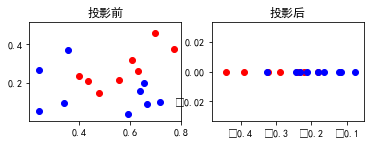

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Xw = np.dot(X,w.reshape(2,1))

# 显示中字
plt.rcParams['font.sans-serif']=['SimHei']

# 绘图，红色正例，蓝色反例
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
for i in range(len(X)):
    if Y[i] == 1:
        plt.scatter(X[i,0],X[i,1],c='r')
    if Y[i] == 0:
        plt.scatter(X[i,0],X[i,1],c='b')
# plt.scatter(X[:,0],X[:,1])
plt.title('投影前')

ax2 = fig.add_subplot(2,2,2)
for i in range(len(X)):
    if Y[i] == 1:
        plt.scatter(Xw[i],0,c='r')
    if Y[i] == 0:
        plt.scatter(Xw[i],0,c='b')
# plt.scatter(Xw,[0 for i in range(len(Xw))])
plt.title('投影后')
plt.show()

## 多分类问题日后再补